In [ ]:
%cd -

/content


In [ ]:
!pwd

/content


In [ ]:
%cd drive/MyDrive/ams_595_python_teaching

/content/drive/MyDrive/ams_595_python_teaching


# **Lecture 8 Introduction to Sympy**

##Introduction

There are two notable Python-based Computer Algebra Systems (CAS):

- SymPy: A Python module applicable in any Python program or IPython session, providing robust CAS capabilities.
- Sage: A comprehensive and robust CAS environment striving to establish an open-source system rivaling Mathematica and Maple. Notably, Sage operates not merely as a standard Python module but as a CAS environment utilizing Python as its programming language.
- Sage, surpassing SymPy in certain aspects, and both offering extensive CAS functionality. SymPy holds the advantage of being a regular Python module, seamlessly integrating with notebooks.

Consequently, in this lecture, we will explore the usage of SymPy. If you are keen on an open-source CAS environment, I suggest delving deeper into Sage.


In [ ]:
from sympy import *

To get nice-looking  LATEX  formatted output run:

In [ ]:
init_printing()

In [ ]:
print(pi)

pi


In [ ]:
pi

π

## Symbolic variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [ ]:
x = Symbol('x')

In [ ]:
type(x)

sympy.core.symbol.Symbol

In [ ]:
(pi + x)**2

       2
(x + π) 

In [ ]:
# we can define more than one variable at once
a, b, c = symbols("a, b, c")

We can add assumptions to symbols when we create them:

In [ ]:
x = Symbol('x', real=True)
print(x.is_imaginary)  # what the output will be for print(x.is_complex)
x = Symbol('x', positive=True)
print(x < 0)
print(x == 0)
print(x > 0)

False
False
False
True


The imaginary units are denoted by I in SymPy.

In [ ]:
1+1*I

1 + ⅈ

In [ ]:
I**2

-1

In [ ]:
I**3 + x

x - ⅈ

There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`:

In [ ]:
f1 = Rational(4,5)
f2 = Rational(4,7)

In [ ]:
f1

4/5

In [ ]:
f1 + f2

48
──
35

In [ ]:
f1 *f2

16
──
35

## Solving Equations

In [ ]:
x = Symbol('x')
solve(x**2 - 1, x)

[-1, 1]

In [ ]:
solve(x**3 - x**2 - 1, x)

⎡                     __________                                              
⎢1   ⎛  1   √3⋅ⅈ⎞    ╱ √93   29                  1                1           
⎢─ + ⎜- ─ - ────⎟⋅3 ╱  ─── + ──  + ─────────────────────────────, ─ + ────────
⎢3   ⎝  2    2  ⎠ ╲╱    18   54                       __________  3           
⎢                                    ⎛  1   √3⋅ⅈ⎞    ╱ √93   29         ⎛  1  
⎢                                  9⋅⎜- ─ - ────⎟⋅3 ╱  ─── + ──       9⋅⎜- ─ +
⎣                                    ⎝  2    2  ⎠ ╲╱    18   54         ⎝  2  

                                         __________                           
      1                 ⎛  1   √3⋅ⅈ⎞    ╱ √93   29          1           1     
───────────────────── + ⎜- ─ + ────⎟⋅3 ╱  ─── + ── , ──────────────── + ─ + 3 
           __________   ⎝  2    2  ⎠ ╲╱    18   54         __________   3   ╲╱
 √3⋅ⅈ⎞    ╱ √93   29                                      ╱ √93   29          
 ────⎟⋅3 ╱  ─── + ──                               

In [ ]:
y = Symbol('y')
solve([x + y - 1, x - y - 1], [x,y]) # solve system of equations

{x: 1, y: 0}

## Evaluate Expressions

SymPy uses a library for arbitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits. By default, numerical evaluation is performed to an accuracy of 15 decimal digits.

In [ ]:
N(pi, n=20)

3.1415926535897932385

In [ ]:
pi.evalf(n=20)

3.1415926535897932385

In [ ]:
y = (x + pi)**3
N(y, 5) # same as evalf

                      3
31.006⋅(0.31831⋅x + 1) 

We can substitute a symbol with a numerical value using the `subs` function:

In [ ]:
N(y.subs(x, 1.5))

100.000246896933

Or subsitute a symbol with a new expression:

In [ ]:
y.subs(x, b+0.2)

             3
(b + 0.2 + π) 

In [ ]:
z = y.subs(x, b+0.2)
N(z.subs(b, 1.3))

100.000246896933

## Combining Numpy and Matplotlib with Sympy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_array = np.linspace(-20, 10, 100)
y_array = np.array([N(((x + pi +E)**2).subs(x, grid_points)) for grid_points in x_array])

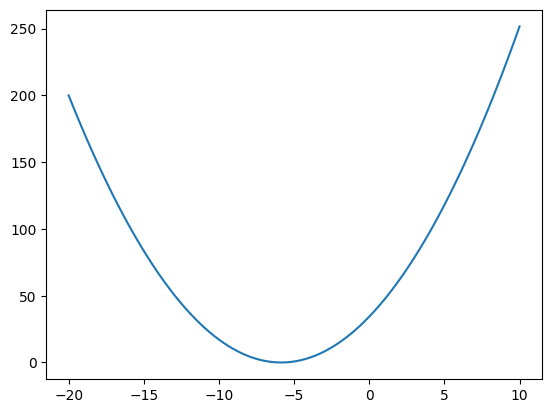

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array);

## lambdify

The lambdify function translates SymPy expressions into Python functions. If an expression is to be evaluated over a large range of values, the evalf() function is not efficient. lambdify acts like a lambda function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. By default, lambdify on implementations in the math standard library.

In [ ]:
i, j = symbols("i,j")
# the first argument is a list of variables; the second argument is the expression; the third specifies the numerical library
f = lambdify([i,j], sin(i)+ j*pi**2, 'numpy')  # f will be a function of: in this case only i, j -> f(i,j)
l1=np.arange(1,5)
l2=np.arange(6,10)
f(l1,l2)

array([60.05909739, 69.99652823, 79.09795522, 88.06963711])

In [ ]:
def my_f(i,j):
  return np.sin(i)+ j*np.pi**2
print(my_f(l1,l2))

[60.05909739 69.99652823 79.09795522 88.06963711]


## Algebraic Manipulation

### Expansion and Factorization

In [ ]:
(x+2)*(x+4)*(x+6)

(x + 2)⋅(x + 4)⋅(x + 6)

In [ ]:
expand((x+2)*(x+4)*(x+6))

 3       2            
x  + 12⋅x  + 44⋅x + 48

In [ ]:
sin(a+b+c)

sin(a + b + c)

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

In [ ]:
expand(sin(a+b+c))

sin(a + b + c)

In [ ]:
expand(sin(a+b), trig=True)

sin(a)⋅cos(b) + sin(b)⋅cos(a)

In [ ]:
expand(sin(a+b+c), trig=True)

-sin(a)⋅sin(b)⋅sin(c) + sin(a)⋅cos(b)⋅cos(c) + sin(b)⋅cos(a)⋅cos(c) + sin(c)⋅c
os(a)⋅cos(b)

In [ ]:
factor(x**3 + 12 * x**2 + 44*x + 48)

(x + 2)⋅(x + 4)⋅(x + 6)

### Simplification

In [ ]:
simplify(x**2 +2*x -x +4 +6 -3*x)

 2           
x  - 2⋅x + 10

In [ ]:
simplify(sin(a)**2 + cos(a)**2)

1

In [ ]:
simplify(sin(x)/cos(x))  # what will simplify(cos(x)/sin(x)) print?

tan(x)

In [ ]:
simplify(cos(x)/sin(x))


  1   
──────
tan(x)

### Fraction Manipulation

To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [ ]:
expr = 1/((x+1)*(x+2))

In [ ]:
expr

       1       
───────────────
(x + 1)⋅(x + 2)

In [ ]:
apart(expr)

    1       1  
- ───── + ─────
  x + 2   x + 1

In [ ]:
expr2 = -1/(x+2) + 1/(x+1)

In [ ]:
expr2

    1       1  
- ───── + ─────
  x + 2   x + 1

In [ ]:
together(expr2)

       1       
───────────────
(x + 1)⋅(x + 2)

In [ ]:
simplify(expr2)  # Simplify usually combines fractions but does not factor, but not gurantee to combine

       1       
───────────────
(x + 1)⋅(x + 2)

## Calculus

In [ ]:
y

       3
(x + π) 

In [ ]:
diff(y, x) # differentiate y with respect to x

         2
3⋅(x + π) 

In [ ]:
diff(y, x, x) # second derivative, differentiate with respect to x twice

6⋅(x + π)

In [ ]:
# multivariate calculus
x, y, z = symbols("x,y,z")
f = E**(x*y) + cos(y*z)

In [ ]:
f

 x⋅y           
ℯ    + cos(y⋅z)

$\frac{d^4}{dx^2dy^2}f$

In [ ]:
diff(f, x,2, y, 2)

⎛ 2  2            ⎞  x⋅y
⎝x ⋅y  + 4⋅x⋅y + 2⎠⋅ℯ   

In [ ]:
f = 2*x

In [ ]:
f

2⋅x

In [ ]:
integrate(f, x) # indefinite integration

 2
x 

In [ ]:
integrate(f, (x, -3, -1))

-8

In [ ]:
integrate(exp(-x**2), (x, -oo, oo)) # improper intergrals, oo is double letter o, stands for infty

√π

Similar to differentiation, you can integrate multivariate expressions as well.

In [ ]:
f = 2*x*y
f

2⋅x⋅y

In [ ]:
integrate(f, x) # indefinite integration

 2  
x ⋅y

## Summation and Product

In [ ]:
n = Symbol("n")

In [ ]:
Sum((-1)**n/(2*n+1), (n, 0, 10))  # summation of (expression) from n = 0 to 10

  10         
 ____        
 ╲           
  ╲        n 
   ╲   (-1)  
   ╱  ───────
  ╱   2⋅n + 1
 ╱           
 ‾‾‾‾        
n = 0        

In [ ]:
4*Sum((-1)**n/(2*n+1), (n, 0, 10)).evalf()

3.23231580940559

In [ ]:
4*Sum((-1)**n/(2*n+1), (n, 0, oo)).evalf()

3.14159265358979

In [ ]:
Product(n, (n, 1, 10)) # product of (expression) from n = 0 to 10

  10   
─┬─┬─  
 │ │  n
 │ │   
n = 1  

## Limits

In [ ]:
limit(sin(x)/x, x, 0) # limit of sinx/x when x approaching 0

1

In [ ]:
f = 3*x*y*E**(x*y)

In [ ]:
f

       x⋅y
3⋅x⋅y⋅ℯ   

In [ ]:
diff(f, x)

     2  x⋅y        x⋅y
3⋅x⋅y ⋅ℯ    + 3⋅y⋅ℯ   

$$\frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$$

In [ ]:
h = Symbol("h")
limit((f.subs(x, x+h) - f)/h, h, 0)

     2  x⋅y        x⋅y
3⋅x⋅y ⋅ℯ    + 3⋅y⋅ℯ   

In [ ]:
limit(1/x, x, 0, dir="+")

∞

In [ ]:
limit(1/x, x, 0, dir="-")

-∞

## Series

In [ ]:
series(exp(x), x) #  expands the expression, around  x=0 by default

         2    3    4     5        
        x    x    x     x     ⎛ 6⎞
1 + x + ── + ── + ── + ─── + O⎝x ⎠
        2    6    24   120        

In [ ]:
series(exp(x), x, 2) # we can expand around any point, x=2 is this case

                         2  2          3  2          4  2          5  2       
 2            2   (x - 2) ⋅ℯ    (x - 2) ⋅ℯ    (x - 2) ⋅ℯ    (x - 2) ⋅ℯ     ⎛  
ℯ  + (x - 2)⋅ℯ  + ─────────── + ─────────── + ─────────── + ─────────── + O⎝(x
                       2             6             24           120           

              
     6       ⎞
 - 2) ; x → 2⎠
              

In [ ]:
series(exp(x), x, 0, 10) # specify the order to which the series expansion should be carried out

         2    3    4     5     6     7       8       9           
        x    x    x     x     x     x       x       x       ⎛ 10⎞
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ────── + O⎝x  ⎠
        2    6    24   120   720   5040   40320   362880         

In [ ]:
expr01 = exp(x).series(x, 0, 5)
expr01

         2    3    4        
        x    x    x     ⎛ 5⎞
1 + x + ── + ── + ── + O⎝x ⎠
        2    6    24        

In [ ]:
expr02 = sin(x).series(x, 0, 3)
expr02

     ⎛ 3⎞
x + O⎝x ⎠

In [ ]:
expr01 * expr02

            ⎛         2    3    4        ⎞
⎛     ⎛ 3⎞⎞ ⎜        x    x    x     ⎛ 5⎞⎟
⎝x + O⎝x ⎠⎠⋅⎜1 + x + ── + ── + ── + O⎝x ⎠⎟
            ⎝        2    6    24        ⎠

In [ ]:
expand(expr01 * expr02)

     2    ⎛ 3⎞
x + x  + O⎝x ⎠

In [ ]:
expr01.removeO() # remove the order information

 4    3    2        
x    x    x         
── + ── + ── + x + 1
24   6    2         

In [ ]:
(cos(x)*sin(x)).series(x, 0, 6) # but note that this is not the correct expansion of $\cos(x)\sin(x)$ to $6$th order:

       3      5        
    2⋅x    2⋅x     ⎛ 6⎞
x - ──── + ──── + O⎝x ⎠
     3      15         

## Linear Algebra

In [ ]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [ ]:
A = Matrix([[m11, m12],[m21, m22]])
A

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [ ]:
b = Matrix([[b1], [b2]])
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [ ]:
det(A)

m₁₁⋅m₂₂ - m₁₂⋅m₂₁

In [ ]:
A**2 # A matmul A

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [ ]:
A * b

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

In [ ]:
A.inv()

⎡       m₂₂               -m₁₂       ⎤
⎢─────────────────  ─────────────────⎥
⎢m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎥
⎢                                    ⎥
⎢      -m₂₁                m₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎦

In [ ]:
A.columnspace()

⎡⎡m₁₁⎤  ⎡m₁₂⎤⎤
⎢⎢   ⎥, ⎢   ⎥⎥
⎣⎣m₂₁⎦  ⎣m₂₂⎦⎦

## Resouces

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.




# **Lecture 8 Introduction to Scientific Computing**

## Scientific Computing

* Scientific computing is the study of algorithms and numerical methods for solving scientific and engineering problems using computers.
* Goals: Scientific computing aims to provide efficient and accurate solutions to complex mathematical models that describe physical, chemical, or biological phenomena.

## Key Components of Scientific Computing

* Mathematical Modeling: The process of formulating real-world problems into mathematical models, often in the form of differential equations, partial differential equations, or algebraic equations.

* Numerical Methods: Techniques for approximating solutions to mathematical models.

* High-Performance Computing: The use of powerful computer hardware, parallel computing, and distributed systems to solve large-scale and computationally intensive problems.

* Software Development: Developing and maintaining software libraries and tools for scientific computation, often in languages like Python, MATLAB, or C/C++.

## Some Scientific Computing Problems

* **Root Finding:** Finding solutions to equations. Methods like the bisection method, Newton's method, and the secant method are commonly used.

* **Linear Algebra:** Solving linear systems of equations, eigenvalue problems, and singular value decomposition.

* **Differential Equations:** Numerical techniques for solving ordinary differential equations (ODEs) and partial differential equations (PDEs).

* **Optimization:** Finding the minimum or maximum of a function, which is crucial for parameter estimation, machine learning, and optimization problems in engineering and science.

## High-Performance Computing

* Parallel Computing: Leveraging multiple processors or cores to perform calculations simultaneously. Parallel programming models include MPI (Message Passing Interface) and OpenMP.

* GPU Computing: Utilizing Graphics Processing Units (GPUs) to accelerate computations, especially for tasks that involve heavy parallelization, like deep learning.

* Cluster and Cloud Computing: Employing clusters and cloud resources to handle large-scale simulations and data analysis.

## Real-World Applications

* Physics: Simulation of physical systems, such as fluid dynamics, quantum mechanics, and astrophysics.

* Engineering: Structural analysis, aerodynamics, and materials science.

* Biology: Computational biology, bioinformatics, and modeling biological systems.

* Finance: Risk assessment, option pricing, and financial modeling.

* Environmental Science: Climate modeling and environmental impact assessment.
* More and more

# **Lecture 8 Introduction to Scientific Computing Part 2: Numerical Algorithms**#

## Commonly Seen Numerical Methods

Here is a list (far away from complete) of common numerical methods. We will briefly talk about some of these in this lecture. Your will be asked to implement some of these algorithms in your assginment.

1. **Root-Finding Methods**:
   - *Bisection Method*: Iteratively narrow down the interval containing a root by bisecting it.
   - *Newton-Raphson Method*: Uses derivatives to iteratively refine an approximation to a root.
   - *Secant Method*: An iterative method for approximating roots without requiring derivative information.

2. **Linear Algebra Methods**:
   - *Gaussian Elimination*: Solves systems of linear equations through row operations.
   - *LU Decomposition*: Decomposes a matrix into lower and upper triangular matrices to solve linear systems.
   - *Iterative Methods (e.g., Jacobi, Gauss-Seidel)*: Solves linear systems iteratively by updating approximations.

3. **Interpolation and Approximation**:
   - *Lagrange Interpolation*: Constructs a polynomial that passes through given data points.
   - *Newton's Divided Difference Interpolation*: A method for polynomial interpolation.
   - *Least Squares Approximation*: Minimizes the sum of the squares of the residuals to approximate data.

4. **Numerical Differentiation and Integration**:
   - *Numerical Integration (e.g., Trapezoidal Rule, Simpson's Rule)*: Approximates definite integrals.
   - *Differentiation (e.g., Finite Difference Methods)*: Estimates derivatives from discrete data.

5. **Ordinary Differential Equations (ODEs)**:
   - *Euler's Method*: Approximates solutions to first-order ODEs.
   - *Runge-Kutta Methods*: Higher-order ODE solvers, e.g., RK4.
   - *Boundary Value Problems (e.g., Shooting Method)*: Solves ODEs with specified boundary conditions.

6. **Partial Differential Equations (PDEs)**:
   - *Finite Difference Method*: Discretizes PDEs in space and time.
   - *Finite Element Method (FEM)*: Decomposes the domain into elements for PDE solution.
   - *Finite Volume Method (FVM)*: Focuses on conservations laws for PDEs.

7. **Optimization Methods**:
   - *Gradient Descent*: An iterative method for optimizing functions, often used in machine learning.
   - *Newton's Method for Optimization*: An iterative method for minimizing or maximizing functions.
   - *Genetic Algorithms*: Optimization inspired by natural selection and genetics.

8. **Monte Carlo Methods**:
   - *Monte Carlo Integration*: Approximates integrals by random sampling.
   - *Markov Chain Monte Carlo (MCMC)*: Generates samples from complex distributions.
   - *Simulated Annealing*: An optimization method inspired by annealing processes in metallurgy.

9. **Numerical Linear Algebra**:
   - *Singular Value Decomposition (SVD)*: Decomposes a matrix into three other matrices and is used in data compression and dimensionality reduction.
   - *Principal Component Analysis (PCA)*: A dimensionality reduction technique based on SVD.
   - *Eigenvalue and Eigenvector Computation*: Used in various applications, including quantum mechanics and vibration analysis.

## Root Finding

Bisection Method:

![link text](https://www.researchgate.net/publication/336638575/figure/fig2/AS:815189725286401@1571367784538/Bisection-method-This-Bisection-method-states-that-if-fx-is-continuous-which-is-defined.ppm)

Explore Newton's method and the Secant method on your own!

## Strassen for Matrix Multiplication

The Strassen algorithm is a divide-and-conquer technique used for efficient matrix multiplication. It reduces the number of basic multiplications required for multiplying two matrices, resulting in faster matrix multiplication for large matrices. The algorithm was developed by Volker Strassen in 1969.

Step 1: Divide

1. Divide the two input matrices, A and B, into four equally sized submatrices. Let's call these submatrices A11, A12, A21, A22, B11, B12, B21, and B22.

Step 2: Recurse

2. Recursively compute seven products of submatrices (P1 to P7) using the following formulas:
   - P1 = A11 * (B12 - B22)
   - P2 = (A11 + A12) * B22
   - P3 = (A21 + A22) * B11
   - P4 = A22 * (B21 - B11)
   - P5 = (A11 + A22) * (B11 + B22)
   - P6 = (A12 - A22) * (B21 + B22)
   - P7 = (A11 - A21) * (B11 + B12)

Step 3: Combine

3. Calculate the four submatrices of the result matrix, C, using the products computed in the previous step:
   - C11 = P5 + P4 - P2 + P6
   - C12 = P1 + P2
   - C21 = P3 + P4
   - C22 = P5 + P1 - P3 - P7

Step 4: Recursion Termination

4. If the submatrices become small enough (below a certain threshold), perform standard matrix multiplication to calculate C11, C12, C21, and C22.

## Jacobi Method for $Ax=b$

The Jacobi method is an iterative algorithm used to solve a system of linear equations, particularly when the system is diagonally dominant or when it can be transformed into a diagonally dominant system. It is one of several iterative methods used for solving such systems, along with methods like Gauss-Seidel and successive over-relaxation (SOR).

**Matrix-based formula**

Then $A$ can be decomposed into a diagonal component $D$, a lower triangular part $L$ and an upper triangular part $U$ :
$$
A=D+L+U \quad \text { where } \quad D=\left[\begin{array}{cccc}
a_{11} & 0 & \cdots & 0 \\
0 & a_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & a_{n n}
\end{array}\right] \text { and } L+U=\left[\begin{array}{cccc}
0 & a_{12} & \cdots & a_{1 n} \\
a_{21} & 0 & \cdots & a_{2 n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n 1} & a_{n 2} & \cdots & 0
\end{array}\right] \text {. }
$$
The solution is then obtained iteratively via
$$
\mathbf{x}^{(k+1)}=D^{-1}\left(\mathbf{b}-(L+U) \mathbf{x}^{(k)}\right) .
$$

**Element-based formula**

The element-based formula for each row $i$ is thus:
$$
x_i^{(k+1)}=\frac{1}{a_{i i}}\left(b_i-\sum_{j \neq i} a_{i j} x_j^{(k)}\right), \quad i=1,2, \ldots, n .
$$
The computation of $x_i^{(k+1)}$ requires each element in $\mathbf{x}^{(k)}$ except itself. Unlike the Gauss-Seidel method, we can't overwrite $x_i^{(k)}$ with $x_i^{(k+1)}$, as that value will be needed by the rest of the computation.

Explore Gauss-Seidel on your own!

## Numerical Integration

Numerical integration, also known as numerical quadrature, is a technique used to approximate the definite integral of a function when an analytical solution is either challenging or impossible. This approach is essential in various fields such as mathematics, physics, engineering, and computer science.

Riemman Sum:

![link text](https://patrickwalls.github.io/mathematicalpython/integration/img/riemann-sums_3_0.png)

![link text](https://patrickwalls.github.io/mathematicalpython/integration/img/trapezoid-rule_21_0.png)



Image Source: Mathematical Python

There are also other commonly used schemes for numerical integration. We will not discuss in this class.

1. Simpson's rule is a higher-precision numerical integration method that uses quadratic approximations to the function in each subinterval. It provides even more accurate results compared to the Trapezoidal rule, especially for smoother functions.

2. Gaussian quadrature is a numerical integration technique that uses weighted sum of function values at specific points within the interval. It provides highly precise estimates for a wide range of functions.

Explore Monte Carlo Integration on your own!

## Numerical Differentiation and Finite Difference Method

Definition of derivatives:
$$f^{\prime}(x) \equiv \lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$


Forward difference:
$$f^{\prime}(x) \approx \frac{f(x+h)-f(x)}{h}, \text{ for some small $h$}$$

Backward difference:
$$f^{\prime}(x) \approx \frac{f(x)-f(x-h)}{h}, \text{ for some small $h$}$$

Centeral difference:
$$f^{\prime}(x) \approx \frac{f(x+h)-f(x-h)}{2 h}$$

Finite difference:

$$
\begin{aligned}
f_x(x, y) & \approx \frac{f(x+h, y)-f(x-h, y)}{2 h} \\
f_y(x, y) & \approx \frac{f(x, y+k)-f(x, y-k)}{2 k} \\
f_{x x}(x, y) & \approx \frac{f(x+h, y)-2 f(x, y)+f(x-h, y)}{h^2} \\
f_{y y}(x, y) & \approx \frac{f(x, y+k)-2 f(x, y)+f(x, y-k)}{k^2} \\
f_{x y}(x, y) & \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}
\end{aligned}
$$

# Not finished, more about numerical algorithms in the coming lectures.